# Looking at the Dataset

The necessary steps covered in this notebook are:
- Loading the data
- Looking at the variables in the dataset, numerical vs categorical
- Visualizing the distribution of the variables to gain insights into the dataset

In [1]:
import pandas as pd

df_url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv'

adult_census_df = pd.read_csv(df_url)

# Adult Census Data preview
adult_census_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


> The goal with this data is to predict whether a person earns over 50k a year from heterogenous data such as age, employment, education, family information, marital status, race, etc.

In [2]:
# Target Colum
target_column = 'class'

(
    adult_census_df[target_column]
    # Previee the value count for each category in the target class
    .value_counts(normalize=True)
)


class
 <=50K    0.760718
 >50K     0.239282
Name: proportion, dtype: float64

> Classes are imbalanced, meaning there are more `<=50K` classes compared to `>50K` classes.

In [3]:
# Determining the numerical and categorical columns
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
num_features = [
    'age',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
]


cat_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]


all_cols = [target_column] + cat_features + num_features

adult_census_df = adult_census_df[all_cols]

> Check the number of `dimensions` of the dataset 

In [5]:
print(
    f'The dataset contains {adult_census_df.shape[0]} samples and '
    f'{adult_census_df.shape[1]} columns'
     )

The dataset contains 48842 samples and 14 columns


# Visual Inspection of Data

Before building a model its a good idea to inspect and visualize the dataset.

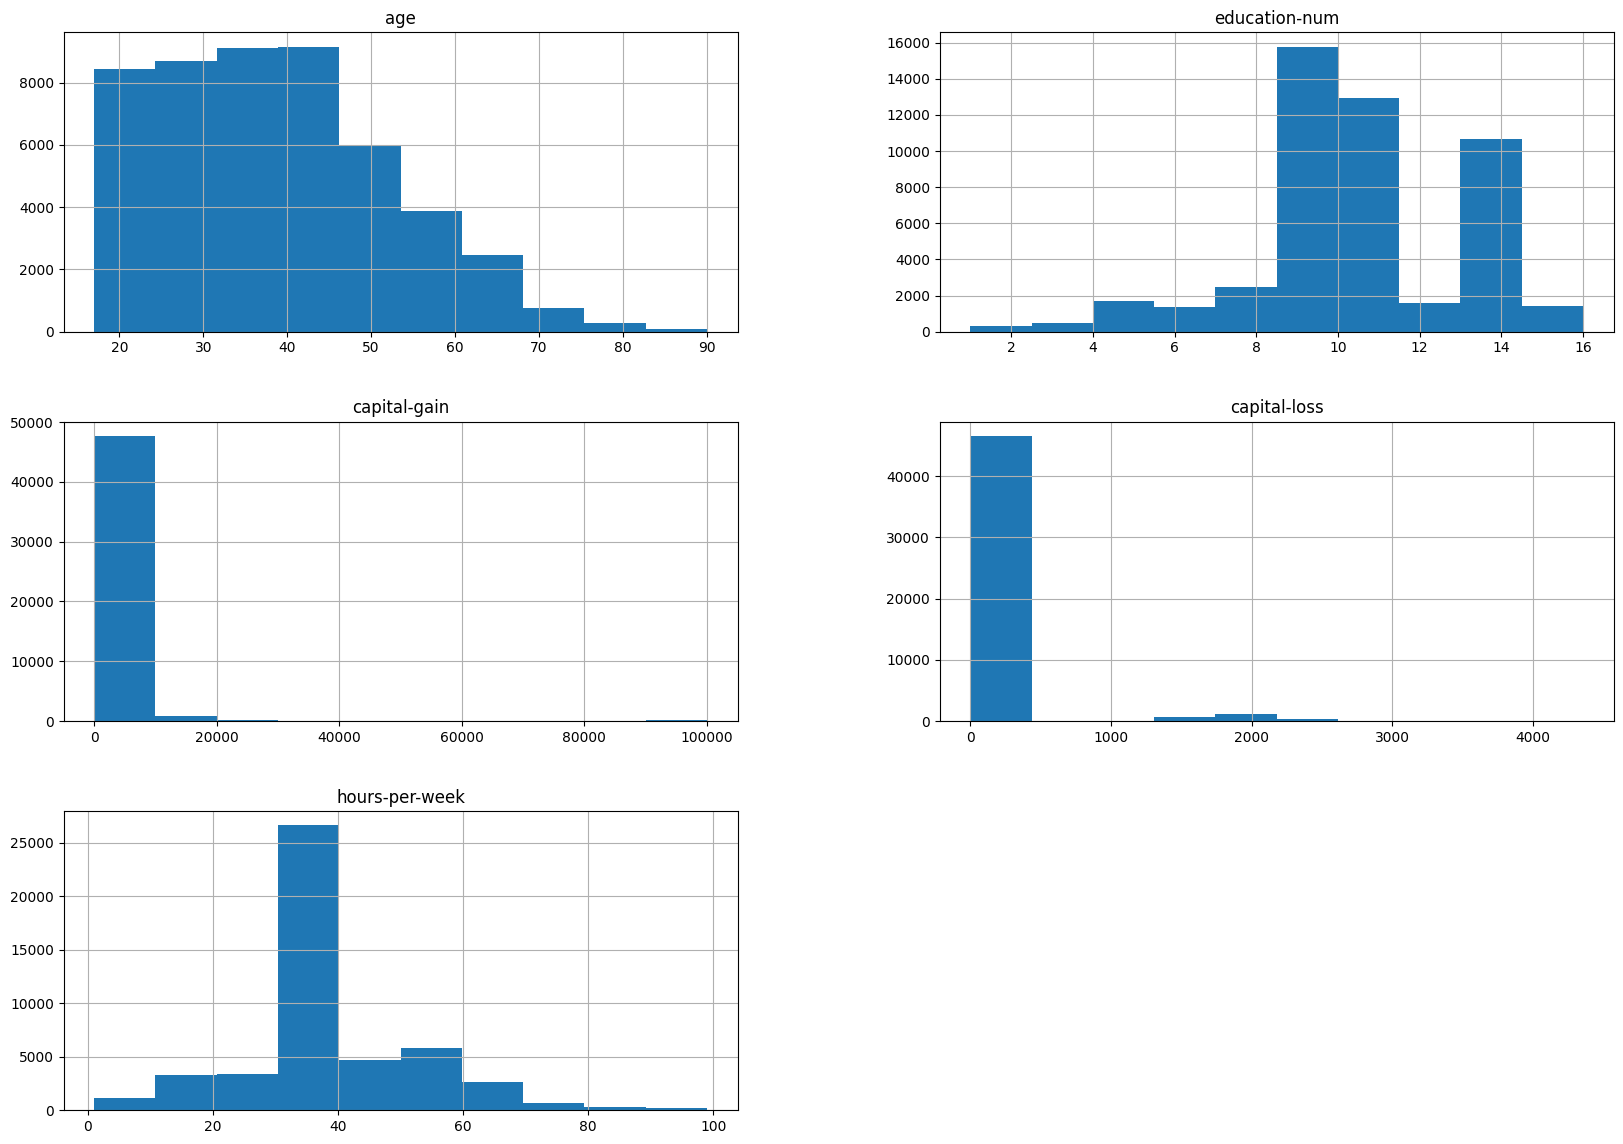

In [6]:
_ = adult_census_df.hist(figsize=(20,14))

Comments from the histogram

- `'age'`: Most of the persons surveyed are below `70 years` 
- `'education-num'`: Peak is b/n 10 - 13 years
- `'hours-ler-week'`: Peaks at 40 hours a week
-  `'capital-gain'` and `'capital-loss'` are close to zero 

In [7]:
# For categorical variables lets preview the distribution
(
    adult_census_df['sex']
    # Distribution
    .value_counts(normalize=True)
)

sex
 Male      0.668482
 Female    0.331518
Name: proportion, dtype: float64

There is an imbalance b/n number of males and females

- This can cause prediction errors fro the under-represented groups. A typical issue is `fairness`

In [8]:
# For categorical variables lets preview the distribution
(
    adult_census_df['education']
    # Distribution
    .value_counts(normalize=True)
)

education
 HS-grad         0.323164
 Some-college    0.222718
 Bachelors       0.164305
 Masters         0.054400
 Assoc-voc       0.042197
 11th            0.037099
 Assoc-acdm      0.032779
 10th            0.028439
 7th-8th         0.019553
 Prof-school     0.017075
 9th             0.015478
 12th            0.013452
 Doctorate       0.012162
 5th-6th         0.010421
 1st-4th         0.005057
 Preschool       0.001699
Name: proportion, dtype: float64

`education-num` and `education` are highly correlated. Lets look at them together

In [9]:
(
    pd.crosstab(
                index=adult_census_df['education'], 
                columns=['education-num'])
)

col_0,education-num
education,
10th,1389
11th,1812
12th,657
1st-4th,247
5th-6th,509
7th-8th,955
9th,756
Assoc-acdm,1601
Assoc-voc,2061


c:\users\marvi\onedrive\documents\phd folder\fa23 semester\principles of predictive analytics class\.class\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


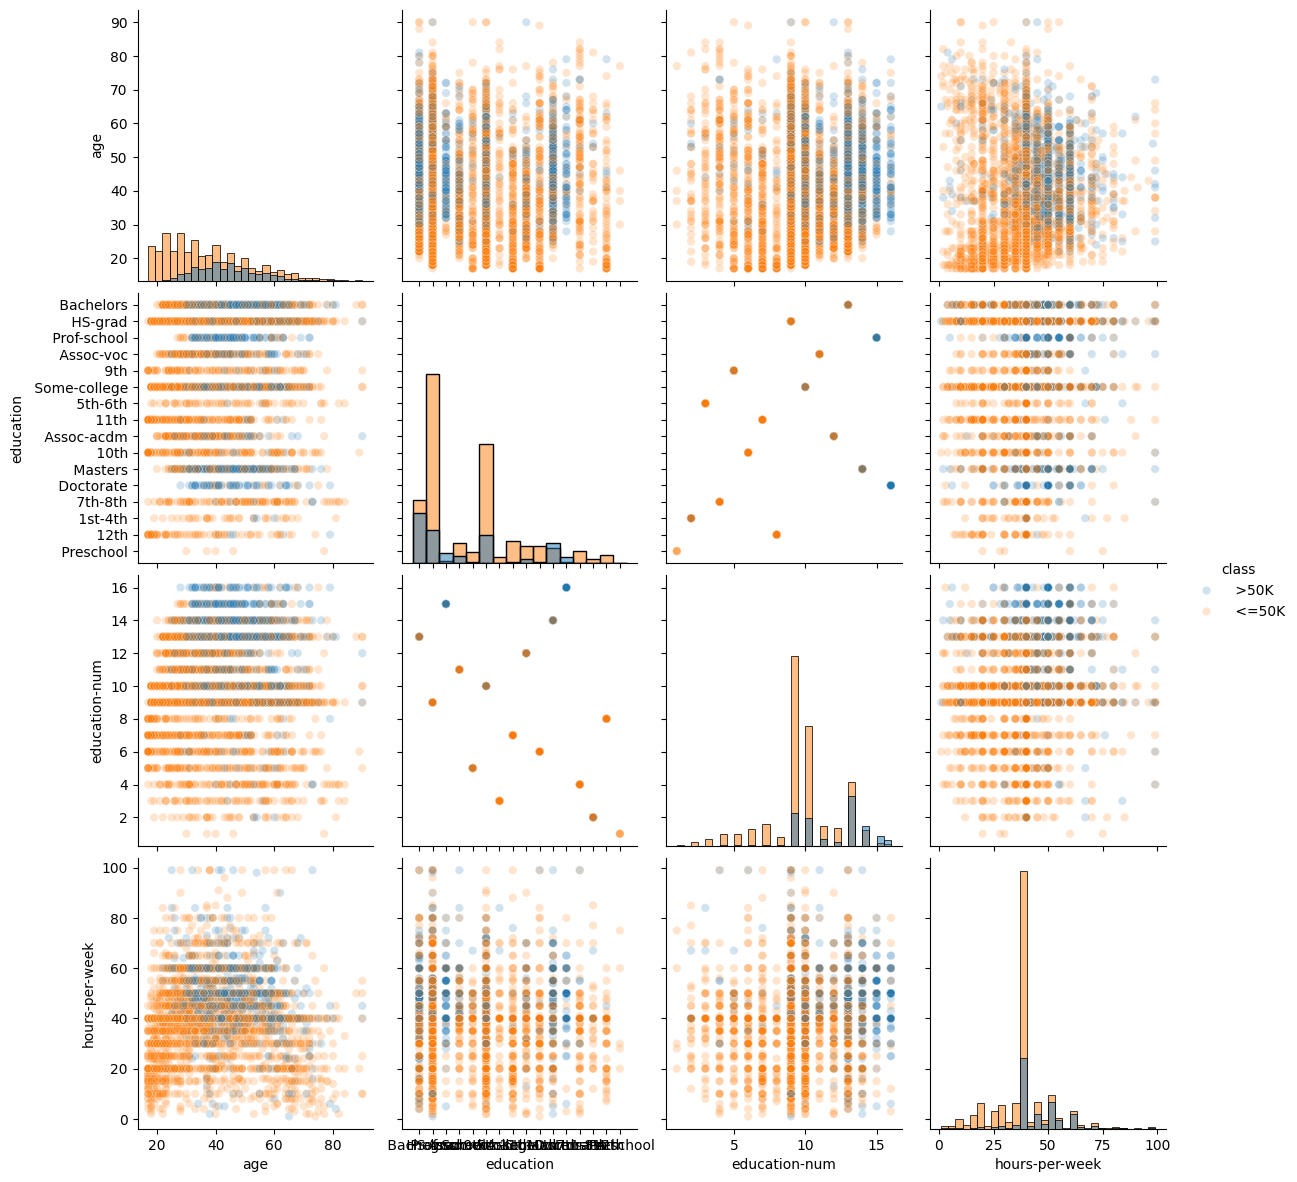

In [10]:
import seaborn as sns

n_samples = 6000

columns = ['age', 'education', 'education-num', 'hours-per-week']

_ = sns.pairplot(
    data=adult_census_df.sample(n_samples),
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
);

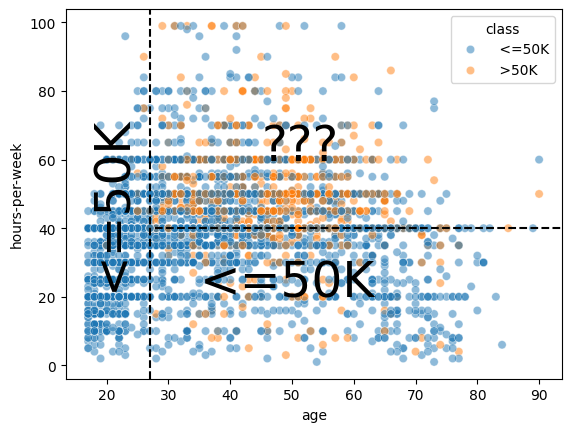

In [11]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census_df[:n_samples],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

# Fitting a Scikit-Learn Model

In [12]:
num_data_features = adult_census_df[num_features][: 3000]

# Series Target Columns
data_target = adult_census_df[target_column][: 3000]

In [13]:
num_data_features_test = adult_census_df[num_features][3000 : ]

# Series Target Columns
data_target_test = adult_census_df[target_column][3000 : ]

In [15]:
print(
    f'The dataset contains {num_data_features.shape[0]} samples and '
    f'{num_data_features.shape[1]} features'
)

The dataset contains 3000 samples and 5 features


In [16]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# Note that we are using a series as the target col
_ = model.fit(num_data_features, data_target)


# Prdictions
target_predicted = model.predict(num_data_features)


In [17]:
target_predicted[: 5]

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K'], dtype=object)

In [18]:
# Number of correct predictions
print(
    "Number of Correct Predictions "
    f"{(target_predicted[: 5] == data_target[:5]).sum()} / 5"
)

Number of Correct Predictions 4 / 5


> Model fails to correctly predict one record

In [19]:
# Prediction accuracy
(data_target == target_predicted).mean()

0.8583333333333333

> The model predicts ~85% of the records correctly. Note that we used the same data to train and evaluate our model.

# Train-test Data Split

When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized). It is harder to conclude on never-seen instances than on already seen ones.

Correct evaluation is easily done by leaving out a subset of the data when training the model and using it afterwards for model evaluation. The data used to fit a model is called training data while the data used to assess a model is called testing dataset.

In [20]:
accuracy = model.score(num_data_features_test, data_target_test)

model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.812


# Working with Numerical Data

In [21]:
# Droping the education-num col as this closely relates to the education col
ad_census_df = adult_census_df.drop(columns='education-num')

ad_census_df.head()

,class,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,capital-gain,capital-loss,hours-per-week
0,<=50K,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,25,0,0,40
1,<=50K,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,38,0,0,50
2,>50K,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,28,0,0,40
3,>50K,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,44,7688,0,40
4,<=50K,?,Some-college,Never-married,?,Own-child,White,Female,United-States,18,0,0,30


In [22]:
# Separate the dataframe into the target and features
features_df, target = ad_census_df.drop(columns='class'), ad_census_df['class']

In [23]:
features_df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,capital-gain,capital-loss,hours-per-week
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,25,0,0,40
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,38,0,0,50
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,28,0,0,40
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,44,7688,0,40
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,18,0,0,30


In [24]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

## Identifying Numerical Data

Numerical data are represented with numbers. They are linked to measurable (quantitative) data, such as age or the number of hours a person works a week.

Predictive models are natively designed to work with numerical data. Moreover, numerical data usually requires very little work before getting started with training.

The first task here is to identify numerical data in our dataset.

In [25]:
# checking data types
features_df.dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
age                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [26]:
# Selecting the numerical features
num_features = features_df.select_dtypes('int64')

num_features.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


# Train-Test Split with Scikit-Learn

In [27]:
from sklearn.model_selection import train_test_split


train_feat, test_feat, train_target, test_target = train_test_split(
                                                            num_features, target,
                                                            random_state=42, stratify=target,
                                                            test_size=0.25
                                                                    )

> When calling the function `train_test_split`, we specified that we would like
to have 25% of samples in the testing set while the remaining samples (75%)
are assigned to the training set. We can check quickly if we got what we
expected.

In [28]:
print(
    f"Number of samples in training: {train_feat.shape[0]} => "
    f"{train_feat.shape[0] / num_features.shape[0] * 100:.1f}% of the"
    " original set"
)

Number of samples in training: 36631 => 75.0% of the original set


In [29]:
print(
    f"Number of samples in testing: {test_feat.shape[0]} => "
    f"{test_feat.shape[0] / num_features.shape[0] * 100:.1f}% of the"
    " original set"
)

Number of samples in testing: 12211 => 25.0% of the original set


In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Fit the model
model.fit(train_feat, train_target)

# Training Accuracy
accuracy = model.score(test_feat, test_target)

print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.799


# Preprocessing Numerical Features

* an example of preprocessing, namely **scaling numerical variables**;
* using a scikit-learn **pipeline** to chain preprocessing and model training.

## Model Fitting with Preprocessing

Transforming the training data with a pipelinedata.

In [33]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36631 entries, 48403 to 26061
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             36631 non-null  int64
 1   capital-gain    36631 non-null  int64
 2   capital-loss    36631 non-null  int64
 3   hours-per-week  36631 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


## Standardizing the data

In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler with a pandas output
scaler = StandardScaler().set_output(transform='pandas')

# Compute on data
train_feat_std = scaler.fit_transform(train_feat)


train_feat_std.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,4.296503e-17,1.066852e-17,5.431246e-18,2.219052e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.580247e+00,-1.443070e-01,-2.197693e-01,-3.185053e+00
25%,-7.793597e-01,-1.443070e-01,-2.197693e-01,-3.647750e-02
50%,-1.240882e-01,-1.443070e-01,-2.197693e-01,-3.647750e-02
75%,6.767993e-01,-1.443070e-01,-2.197693e-01,3.671861e-01
max,3.734733e+00,1.340392e+01,1.048255e+01,4.726753e+00


> Notice that the mean of all variables is close to 0 with the standard deviation close to 1.

## Using a Scikit-Learn Pipeline

In [42]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


model = make_pipeline(StandardScaler(), LogisticRegression())

model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

> The `make_pipeline` function did not require us to give a name to each step.
Indeed, it was automatically assigned based on the name of the classes
provided; a `StandardScaler` step is named `"standardscaler"` in the resulting
pipeline. We can check the name of each steps of our model:

In [43]:
# What are the steps
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [44]:
start = time.time()

# Fit the model
model.fit(train_feat, train_target)

# Check time elapsed
elapsed_time = time.time() - start

In [46]:
predicted_target = model.predict(test_feat)

predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [47]:
model_name = model.__class__.__name__

score = model.score(test_feat, test_target)

print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations"
)

The accuracy using a Pipeline is 0.799 with a fitting time of 0.105 seconds in 12 iterations


# Model Evaluation Using Cross Validation

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Initialize your model
model = make_pipeline(StandardScaler(), LogisticRegression())

## The need for Cross Validation

Cross-validation consists of repeating
the procedure such that the training and testing sets are different each time.
Generalization performance metrics are collected for each repetition and then
aggregated. As a result we can assess the variability of our measure of the
model's generalization performance.

Note that there exists several cross-validation strategies, each of them
defines how to repeat the `fit`/`score` procedure.

Cross-validation is therefore computationally intensive because it requires
training several models instead of one.

In scikit-learn, the function `cross_validate` allows to do cross-validation
and you need to pass it the model, the data, and the target. Since there
exists several cross-validation strategies, `cross_validate` takes a parameter
`cv` which defines the splitting strategy.

In [61]:
# Numerical Data Features
num_data_features = adult_census_df.select_dtypes('number')

# Series Target Column
data_target = adult_census_df[target_column]

In [62]:
from sklearn.model_selection import cross_validate

# Using Cross Validation - Note that here I use the full dataset
cv_result = cross_validate(model, num_data_features, target, cv=5)

cv_result

{'fit_time': array([0.10433388, 0.11389852, 0.10979104, 0.09418154, 0.1104157 ]),
 'score_time': array([0.03127813, 0.01602316, 0.03126359, 0.01564741, 0.01964355]),
 'test_score': array([0.81216092, 0.8096018 , 0.81337019, 0.81326781, 0.82207207])}

The output of `cross_validate` is a Python dictionary, which by default
contains three entries:
- (i) the time to train the model on the training data for each fold,
  `fit_time`
- (ii) the time to predict with the model on the testing data for each fold,
  `score_time`
- (iii) the default score on the testing data for each fold, `test_score`.

Setting `cv=5` created 5 distinct splits to get 5 variations for the training
and testing sets. Each training set is used to fit one model which is then
scored on the matching test set. The default strategy when setting `cv=int` is
the K-fold cross-validation where `K` corresponds to the (integer) number of
splits. Setting `cv=5` or `cv=10` is a common practice, as it is a good
trade-off between computation time and stability of the estimated variability.

Note that by default the `cross_validate` function discards the `K` models
that were trained on the different overlapping subset of the dataset. The goal
of cross-validation is not to train a model, but rather to estimate
approximately the generalization performance of a model that would have been
trained to the full training set, along with an estimate of the variability
(uncertainty on the generalization accuracy).

You can pass additional parameters to
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
to collect additional information, such as the training scores of the models
obtained on each round or even return the models themselves instead of
discarding them. These features will be covered in a future notebook.

Let's extract the scores computed on the test fold of each cross-validation
round from the `cv_result` dictionary and compute the mean accuracy and the
variation of the accuracy across folds.

In [63]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.814 ± 0.004


# Handling Categorical Data


In [68]:
# Load the Dataset
adult_census_df = pd.read_csv(df_url)


# Series Target Column
data_target = adult_census_df[target_column]


# Drop the education-num column
adult_census_df = adult_census_df.drop(columns=['education-num', 'class'])


# Numerical Data Features
num_data_features = adult_census_df.select_dtypes('number')

cat_data_features = adult_census_df.select_dtypes('object')



## Selecting features with scikit-learn



In [70]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)

categorical_columns = categorical_columns_selector(adult_census_df)

categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

## Encoding Categorical Data

### Encoding Ordinal Categories

In [71]:
from sklearn.preprocessing import OrdinalEncoder

# Select the column
education_col = cat_data_features[['education']]

# Initialize the Ordinal Encoder
encoder = OrdinalEncoder().set_output(transform='pandas')

# Encoded Col
edu_enc = encoder.fit_transform(education_col)


edu_enc.head()

,education
0,1.0
1,11.0
2,7.0
3,15.0
4,15.0


> The education column has been replaced by numerical values.

In [73]:
encoder.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

In [74]:
# Applying the encoder to all categories

cat_data_feat_enc = encoder.fit_transform(cat_data_features)

cat_data_feat_enc[:5]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,4.0,1.0,4.0,7.0,3.0,2.0,1.0,39.0
1,4.0,11.0,2.0,5.0,0.0,4.0,1.0,39.0
2,2.0,7.0,2.0,11.0,0.0,4.0,1.0,39.0
3,4.0,15.0,2.0,7.0,0.0,2.0,1.0,39.0
4,0.0,15.0,4.0,0.0,3.0,4.0,0.0,39.0


We see that the categories have been encoded for each feature (column)
independently. We also note that the number of features before and after the
encoding is the same.

However, be careful when applying this encoding strategy:
using this integer representation leads downstream predictive models
to assume that the values are ordered (0 < 1 < 2 < 3... for instance).

By default, `OrdinalEncoder` uses a lexicographical strategy to map string
category labels to integers. This strategy is arbitrary and often
meaningless. For instance, suppose the dataset has a categorical variable
named `"size"` with categories such as "S", "M", "L", "XL". We would like the
integer representation to respect the meaning of the sizes by mapping them to
increasing integers such as `0, 1, 2, 3`.
However, the lexicographical strategy used by default would map the labels
"S", "M", "L", "XL" to 2, 1, 0, 3, by following the alphabetical order.

The `OrdinalEncoder` class accepts a `categories` constructor argument to
pass categories in the expected ordering explicitly. You can find more
information in the
[scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
if needed.

If a categorical variable does not carry any meaningful order information
then this encoding might be misleading to downstream statistical models and
you might consider using one-hot encoding instead (see below).

## Nominal Encoding


`OneHotEncoder` is an alternative encoder that prevents the downstream
models to make a false assumption about the ordering of categories. For a
given feature, it creates as many new columns as there are possible
categories. For a given sample, the value of the column corresponding to the
category is set to `1` while all the columns of the other categories
are set to `0`.

We can encode a single feature (e.g. `"education"`) to illustrate how the
encoding works.

In [79]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, min_frequency=0.05, handle_unknown='ignore').set_output(transform='pandas')

# Encoded Data
edu_encoded = encoder.fit_transform(education_col)

# Preview the data
edu_encoded.head()

,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Some-college,education_infrequent_sklearn
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [80]:
# Applying Nominal Encoding to the entire dataset
cat_data_feat_enc = encoder.fit_transform(cat_data_features)


# Preview the data
cat_data_feat_enc.head()

,workclass_ ?,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,workclass_infrequent_sklearn,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Some-college,education_infrequent_sklearn,...,relationship_ Own-child,relationship_ Unmarried,relationship_infrequent_sklearn,race_ Black,race_ White,race_infrequent_sklearn,sex_ Female,sex_ Male,native-country_ United-States,native-country_infrequent_sklearn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Choosing an Encoding Strategy (Ordinal vs Nominal)

> In general **OneHotEncoder** is the encoding strategy used when the downstream models are **linear models** while **OrdinalEncoder** is often a good strategy with **tree-based models**.


Using an `OrdinalEncoder` outputs ordinal categories. This means
that there is an order in the resulting categories (e.g. `0 < 1 < 2`). The
impact of violating this ordering assumption is really dependent on the
downstream models. Linear models would be impacted by misordered categories
while tree-based models would 

You can still use an `OrdinalEncoder` with linear models but you need to be
sure that:
- the original categories (before encoding) have an ordering;
- the encoded categories follow the same ordering than the original
  categor


One-hot encoding categorical variables with high cardinality can cause
computational inefficiency in tree-based models. Because of this, it is not
recommended to use `OneHotEncoder` in such cases even if the original
categories do not have a given order.ies.not.

We see that the `"Holand-Netherlands"` category is occurring rarely. This will
be a problem during cross-validation: if the sample ends up in the test set
during splitting then the classifier would not have seen the category during
training and would not be able to encode it.

In scikit-learn, there are some possible solutions to bypass this issue:

* list all the possible categories and provide them to the encoder via the
  keyword argument `categories` instead of letting the estimator automatically
  determine them from the training data when calling fit;
* set the parameter `handle_unknown="ignore"`, i.e. if an unknown category is
  encountered during transform, the resulting one-hot encoded columns for this
  feature will be all zeros;
* adjust the `min_frequency` parameter to collapse the rarest categories
  observed in the training data into a single one-hot encoded feature. If you
  enable this option, you can also set `handle_unknown="infrequent_if_exist"`
  to encode the unknown categories (categories only observed at predict time)
  as ones in that last column.

In [82]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
        OneHotEncoder(sparse_output=False, min_frequency=0.05, handle_unknown='ignore'),
        LogisticRegression(max_iter=500)
                     )

# Using cross_val to check the generalization performance
cv_results = cross_validate(model,
                           cat_data_features,
                            data_target,
                            cv=5,
                            error_score="raise"
                           )


cv_results

{'fit_time': array([0.56180859, 0.61877084, 0.54795122, 0.43773103, 0.44829559]),
 'score_time': array([0.03673148, 0.03684807, 0.02354169, 0.02578926, 0.02442026]),
 'test_score': array([0.82444467, 0.82710615, 0.82309582, 0.82575758, 0.82657658])}

> The categorical variables are slightly more predictive than the numerical variables

# Using Categorical and Numerical Variables Together

In [83]:
# Load the Dataset
adult_census_df = pd.read_csv(df_url)


# Series Target Column
data_target = adult_census_df[target_column]


# Drop the education-num column
adult_census_df = adult_census_df.drop(columns=['education-num', 'class'])


# Numerical Data Features
num_data_features = adult_census_df.select_dtypes('number')

cat_data_features = adult_census_df.select_dtypes('object')



In [84]:
# Alternatively
# from sklearn.compose import make_column_selector as selector

# numerical_columns_selector = selector(dtype_exclude=object)
# categorical_columns_selector = selector(dtype_include=object)

# numerical_columns = numerical_columns_selector(data)
# categorical_columns = categorical_columns_selector(data)

## Dispatch Columns to a Specific Processor

Scikit-learn provides a `ColumnTransformer` class which sends specific
columns to a specific transformer, making it easy to fit a single predictive
model on a dataset that combines both kinds of variables together
(heterogeneously typed tabular data).

We first define the columns depending on their data type:

* **one-hot encoding** is applied to categorical columns. Besides, we use
  `handle_unknown="ignore"` to solve the potential issues due to rare
  categories.
* **numerical scaling** numerical features which will be standardized.

Now, we create our `ColumnTransfomer` by specifying three values: the
preprocessor name, the transformer, and the columns. First, let's create the
preprocessors for the numerical and categorical parts.

In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Create the Preprocessors
categorical_preprocessor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

# Create the Transformers
pre_proc = ColumnTransformer(
                [
                    ('one-hot-encoder', categorical_preprocessor, cat_data_features.columns),
                    ('standard_scaler', numerical_preprocessor, num_data_features.columns)
                ]
    
                            )



![](col_trans.png)

A `ColumnTransformer` does the following:

* It **splits the columns** of the original dataset based on the column names
  or indices provided. We obtain as many subsets as the number of transformers
  passed into the `ColumnTransformer`.
* It **transforms each subsets**. A specific transformer is applied to each
  subset: it internally calls `fit_transform` or `transform`. The output of
  this step is a set of transformed datasets.
* It then **concatenates the transformed datasets** into a single dataset.

The important thing is that `ColumnTransformer` is like any other scikit-learn
transformer. In particular it can be combined with a classifier in a
`Pipeline`:

In [90]:
# Preprocessing your model
model = make_pipeline(pre_proc, LogisticRegression(max_iter=1000))

# Preview your model
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [91]:
cv_results = cross_validate(model,
                           adult_census_df,
                           data_target,
                           cv=5,
                           error_score="raise"
                           )

cv_results

{'fit_time': array([1.72059202, 1.58048725, 1.48080897, 1.53797007, 1.45612049]),
 'score_time': array([0.02500725, 0.034266  , 0.03468037, 0.03685188, 0.02309513]),
 'test_score': array([0.8512642 , 0.8498311 , 0.84756347, 0.85227273, 0.85524161])}

In [92]:
scores = cv_results["test_score"]

print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.851 ± 0.003


## Fitting more Powerful Models

**Linear models** are nice because they are usually cheap to train, **small**
to deploy, **fast** to predict and give a **good baseline**.

However, it is often useful to check whether more complex models such as an
ensemble of decision trees can lead to higher predictive performance. In this
section we use such a model called **gradient-boosting trees** and evaluate
its generalization performance. More precisely, the scikit-learn model we use
is called `HistGradientBoostingClassi module.

For tree-based models, the handling of numerical and categorical variables is
simpler than for linear models:
* we do **not need to scale the numerical features**
* using an **ordinal encoding for the categorical variables** is fine even if
  the encoding results in an arbitrary ordering

Therefore, for `HistGradientBoostingClassifier`, the preprocessing pipeline is
slightly simpler than the one we saw earlier for the `LogisticRegression`:

In [93]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder


cat_processor = OrdinalEncoder(
                        handle_unknown='use_encoded_value', unknown_value=-1
                              )

preprocessor = ColumnTransformer(
                    [
                        ('categorical', cat_processor, cat_data_features.columns)
                    ],
                    remainder='passthrough'
                                )


model = make_pipeline(preprocessor, HistGradientBoostingClassifier())


cv_results = cross_validate(model,
                           adult_census_df,
                           data_target,
                           cv=5,
                           error_score="raise")


cv_results

{'fit_time': array([0.99314499, 0.75602055, 0.7606566 , 0.75061607, 0.77127385]),
 'score_time': array([0.04643703, 0.05077744, 0.05150366, 0.05838943, 0.05710077]),
 'test_score': array([0.87061112, 0.87347733, 0.87223587, 0.874181  , 0.87694513])}

In [94]:
scores = cv_results["test_score"]

print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.873 ± 0.002
